torch.Size([100, 1])
torch.Size([100, 1])
Epoch: 10, loss = 4445.3027
Epoch: 20, loss = 3317.1687
Epoch: 30, loss = 2500.3137
Epoch: 40, loss = 1908.2485
Epoch: 50, loss = 1478.7109
Epoch: 60, loss = 1166.8149
Epoch: 70, loss = 940.1605
Epoch: 80, loss = 775.3298
Epoch: 90, loss = 655.3784
Epoch: 100, loss = 568.0323


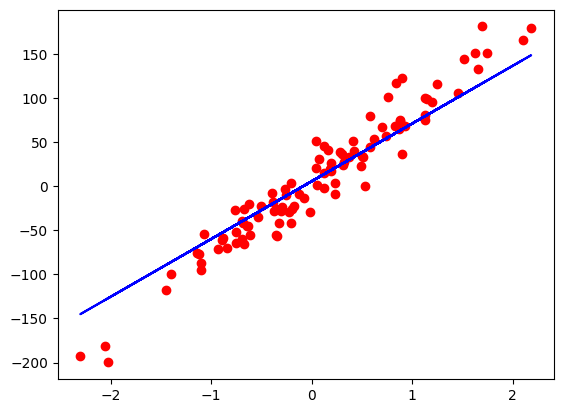

In [5]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) training loop
# - forward pass: compute prediction
# - backword pass: gradients
# - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.reshape(shape=(y.shape[0], 1))
print(x.shape)
print(y.shape)

n_samples, n_features = x.shape
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
# 2) loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(x)
  loss = criterion(y_predicted, y)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f"Epoch: {epoch + 1}, loss = {loss.item():.4f}")

#plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, "ro")
plt.plot(x_numpy, predicted, "b")
plt.show()


